In [8]:
import pandas as pd
df = pd.read_excel('/content/fear_greed_index(1).csv.xlsx')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')


In [9]:
df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
df.info()
df.shape
df.head()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


,0
timestamp,int64
value,int64
classification,object
date,datetime64[ns]


In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
timestamp,2644.0,NaN,NaN,NaN,1631898885.022693,1517463000.0,1574811000.0,1631899800.0,1688988600.0,1746163800.0,65979674.322218
value,2644.0,NaN,NaN,NaN,46.981089,5.0,28.0,46.0,66.0,95.0,21.82768
classification,2644,5,Fear,781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,2644,NaN,NaN,NaN,2021-09-17 11:44:45.022692864,2018-02-01 00:00:00,2019-11-26 18:00:00,2021-09-17 12:00:00,2023-07-10 06:00:00,2025-05-02 00:00:00,NaN


In [12]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)
df = df.dropna()
df = df.drop_duplicates()
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]
print("Data shape after cleaning:", df.shape)


Missing values per column:
 timestamp         0
value             0
classification    0
date              0
dtype: int64
Data shape after cleaning: (2644, 4)


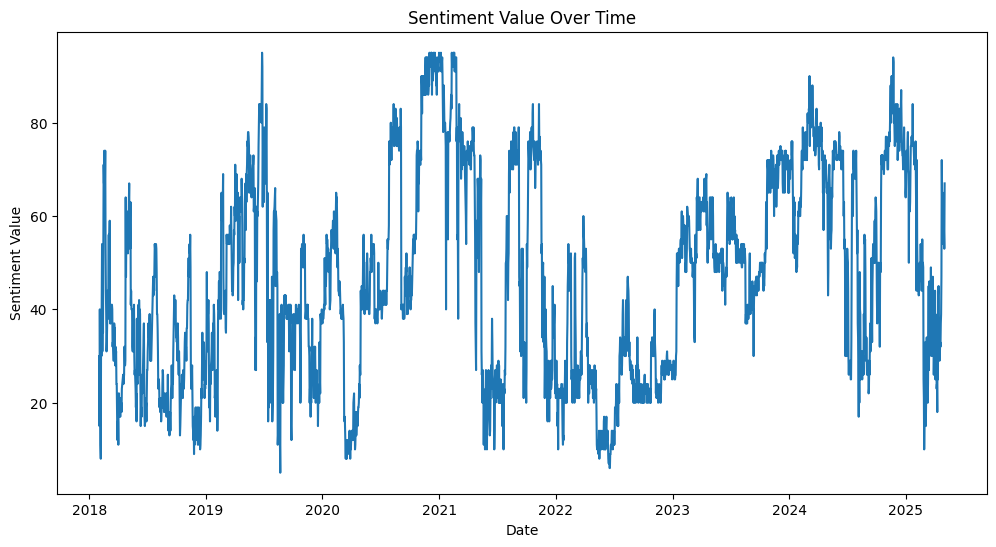

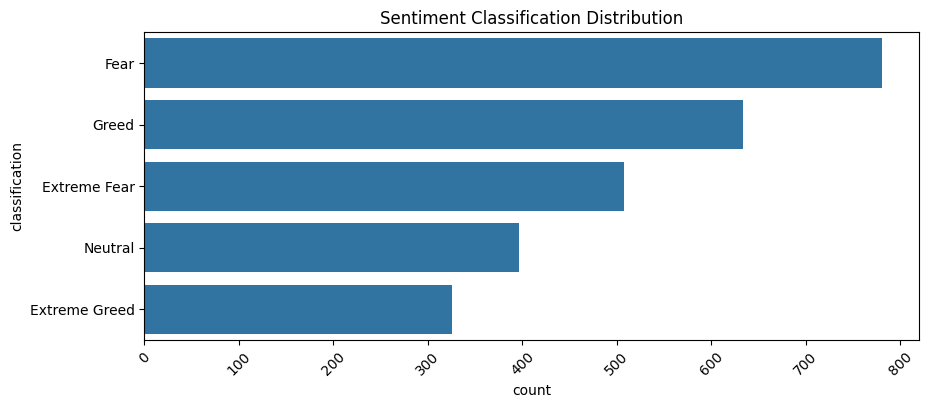

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['value'])
plt.title('Sentiment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(df['classification'], order=df['classification'].value_counts().index)
plt.title('Sentiment Classification Distribution')
plt.xticks(rotation=45)
plt.show()


In [14]:
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
df['classification_cat'] = pd.Categorical(df['classification'], categories=sentiment_order, ordered=True)
df['value_lag1'] = df['value'].shift(1)
df['value_lag7'] = df['value'].shift(7)
df['rolling_mean_7'] = df['value'].rolling(window=7).mean()
df['rolling_std_7'] = df['value'].rolling(window=7).std()
df = df.dropna()


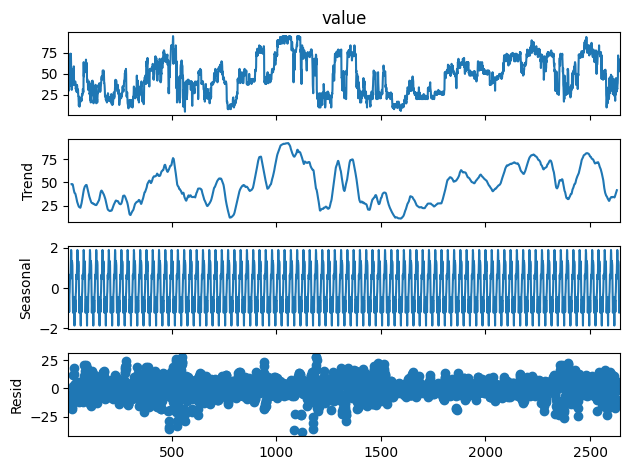

ADF Statistic: -5.573549
p-value: 0.000001


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

result = seasonal_decompose(df['value'], model='additive', period=30)
result.plot()
plt.show()

adf_result = adfuller(df['value'])
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])


ADF Statistic (-5.573549): This is the test statistic. More negative values suggest a stronger rejection of the null hypothesis (that the time series is non-stationary).
p-value (0.000001): This is the probability of observing the test results, or more extreme results, if the null hypothesis is true. A small p-value (typically less than 0.05) indicates strong evidence against the null hypothesis.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

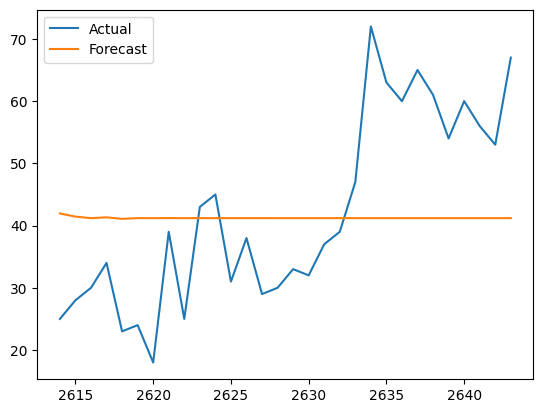

In [16]:
from statsmodels.tsa.arima.model import ARIMA

train = df['value'][:-30]
test = df['value'][-30:]

model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

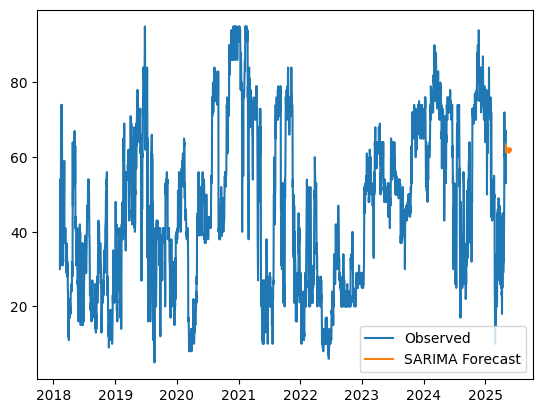

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
sarima_model = SARIMAX(df['value'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()
forecast_sarima = sarima_fit.forecast(steps=30)
plt.plot(df['date'], df['value'], label='Observed')
plt.plot(pd.date_range(df['date'].iloc[-1], periods=30, freq='D'), forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmped5gare0/gz8bnabk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmped5gare0/nj902c58.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65303', 'data', 'file=/tmp/tmped5gare0/gz8bnabk.json', 'init=/tmp/tmped5gare0/nj902c58.json', 'output', 'file=/tmp/tmped5gare0/prophet_model7ipvm12v/prophet_model-20251023104132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:41:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


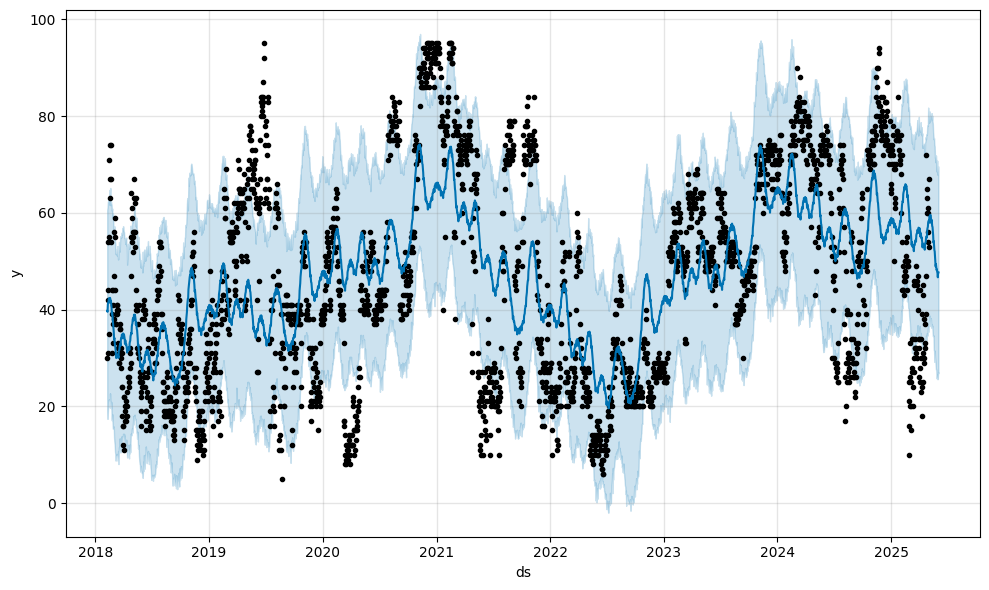

In [18]:
from prophet import Prophet
prophet_df = df[['date', 'value']].rename(columns={'date': 'ds', 'value': 'y'})
model = Prophet()
model.fit(prophet_df)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
model.plot(forecast)
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1079
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0094
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0070
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0070
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061
Epoch 16/50
66/66 ━

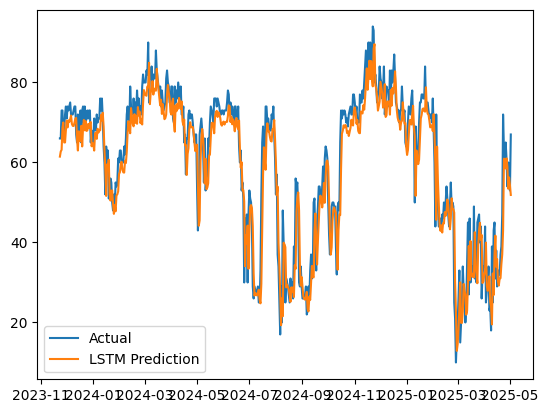

In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Scale data to [0,1]
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df['value'].values.reshape(-1,1))

# Prepare sequences (e.g., sequence length 10)
X, y = [], []
seq_length = 10
for i in range(len(scaled_values) - seq_length):
    X.append(scaled_values[i:i + seq_length])
    y.append(scaled_values[i + seq_length])

X, y = np.array(X), np.array(y)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
# graph plot
import matplotlib.pyplot as plt
plt.plot(df['date'].iloc[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1,1)), label='Actual')
plt.plot(df['date'].iloc[-len(y_test):], y_pred, label='LSTM Prediction')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1886
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0211
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0048
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048
Epoch 16/50
66/66 ━━━━━━━━━━━━

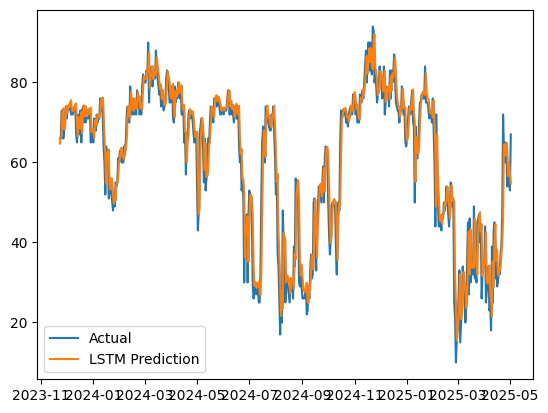

In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df['value'].values.reshape(-1,1))
X, y = [], []
seq_length = 10
for i in range(len(scaled_values) - seq_length):
    X.append(scaled_values[i:i + seq_length])
    y.append(scaled_values[i + seq_length])

X, y = np.array(X), np.array(y)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
model = Sequential()
model.add(GRU(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
import matplotlib.pyplot as plt
plt.plot(df['date'].iloc[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1,1)), label='Actual')
plt.plot(df['date'].iloc[-len(y_test):], y_pred, label='GRU Prediction')
plt.legend()
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
le = LabelEncoder()
df['classification_encoded'] = le.fit_transform(df['classification_cat'])
feature_cols = ['value_lag1', 'value_lag7', 'rolling_mean_7', 'rolling_std_7']
X = df[feature_cols]
y = df['classification_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


               precision    recall  f1-score   support

 Extreme Fear       0.50      0.53      0.52        15
Extreme Greed       0.77      0.78      0.78       116
         Fear       0.68      0.77      0.72        98
        Greed       0.81      0.80      0.81       230
      Neutral       0.53      0.43      0.48        69

     accuracy                           0.73       528
    macro avg       0.66      0.66      0.66       528
 weighted avg       0.73      0.73      0.73       528



The model seems to perform best on the "Greed" and "Extreme Greed" classes, with high precision, recall, and f1-scores.
It performs reasonably well on "Fear", but slightly less so than on the "Greed" categories.
The "Extreme Fear" and "Neutral" classes have lower precision, recall, and f1-scores compared to the other classes. This suggests the model is less effective at identifying these sentiments accurately.